# 1. Making corner plots and importing catalog of candidates

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
# We use cogwheel for plotting (https://github.com/jroulet/cogwheel)
import sys
sys.path.append('/data/jayw/IAS/GW/cogwheel')
from cogwheel import sampling, posterior, data, likelihood, gw_plotting, utils
from cogwheel.cosmology import z_of_d_luminosity

In [3]:
# Please download the PE samples from https://drive.google.com/drive/folders/1YkuIo-yIJhIOSX3B0zRGlSJzwIT5D61U?usp=sharing
# and rename the path below
samples_dir = Path('/data/jayw/IAS/GW/Data/HM_O3a_search/PE_samples')

In [4]:
# List of new events from arXiv:2312.06631 Table 1

New_IAS_events = [(0, 'GWC190605_025957'),
                 (1, 'GWC190806_033721'),
                 (2, 'GWC190524_134109'),
                 (3, 'GWC191113_103541'),
                 (4, 'GWC190615_030234'),
                 (5, 'GWC190604_103812'),
                 (6, 'GWC191228_195619'),
                 (7, 'GWC200304_172806'),
                 (8, 'GWC190530_030659'),
                 (9, 'GWC190511_163209'),
                 (10, 'GWC200210_100022'),
                 (11, 'GWC200301_211019'),
                 (12, 'GWC190911_195101'),
                 (13, 'GWC190530_133833')]

In [5]:
eventname = New_IAS_events[6][1]

In [8]:
def transform_samples(s, lnl_cutoff=25):
    s['chieff'] = (s['m1']*s['s1z']+s['m2']*s['s2z'])/(s['m1']+s['m2'])
    s['lnq'] = -np.abs(s['lnq'] )
    s['z'] = z_of_d_luminosity(s['d_luminosity'])
    s['m1_source'] = s['m1']/(1+ s['z'])
    s['m2_source'] = s['m2']/(1+ s['z'])
    s['mtot'] = (s['m1']+s['m2'])
    s['q'] = np.exp(s['lnq'])
    s['s1_perp'] = np.sqrt(s['s1x_n']**2 + s['s1y_n']**2)
    s = s[s.lnl > (s.lnl.max() - lnl_cutoff)]
    s = s[s.lnl > 2]
    return(s)

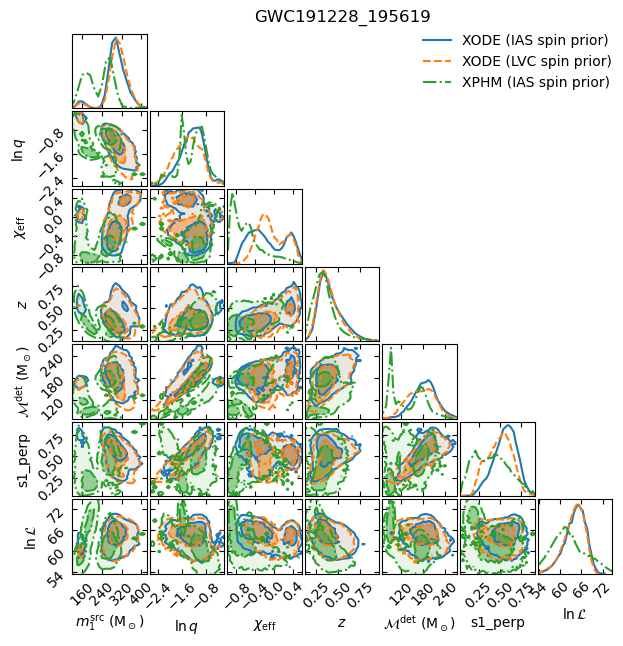

In [9]:
s0 = transform_samples(pd.read_feather(samples_dir/f'{eventname}/IntrinsicIASPrior_IMRPhenomXODE_P_HM/samples.feather'))
s1 = transform_samples(pd.read_feather(samples_dir/f'{eventname}/IntrinsicLVCPrior_IMRPhenomXODE_P_HM/samples.feather'))
s2 = transform_samples(pd.read_feather(samples_dir/f'{eventname}/IntrinsicIASPrior_IMRPhenomXPHM_P_HM/samples.feather'))

# Note that the samples using NAUTILUS come with weights and these are implicitly being
# passed to the plotter
mcp = gw_plotting.MultiCornerPlot((s0, s1, s2),
                    bins=40, labels=['XODE (IAS spin prior)', 'XODE (LVC spin prior)', 'XPHM (IAS spin prior)'],
                       params=['m1_source', 'lnq', 'chieff', 'z','mchirp','s1_perp', 'lnl'], density=True)

mcp.plot(tightness=0.99, max_figsize=7, title=eventname)

In [10]:
# We also provide a dictionary containing the properties of candidates (both above and below threshold) from our search
# This file can be downloaded from the same link as above
import json
cands_dict = json.load(open('/data/jayw/IAS/GW/Data/HM_O3a_search/PE_samples/IAS_HM_O3_triggers.json', 'r'))

In [11]:
cands_dict['GWC191228_195619']

{'tgps': 1261598197.1296387,
 'pastro': 0.6707330261573474,
 'ifar_global': 0.120420370654101,
 'ifar_bank': 3.9962794520547944,
 'snr2_H1': 20.332398870172902,
 'snr2_L1': 89.4503984469477,
 'snr2_HL_modes': [[17.262987654001797, 81.67733618250989],
  [2.47685612032996, 5.6020147224552215],
  [0.5925550958411411, 2.171047541982604]],
 'best_template_params': {'m1': 187.64070952760372,
  'm2': 130.13337416428212,
  's1z': -0.4022795141429013,
  's2z': -0.39263385821572633,
  'l1': 0.0,
  'l2': 0.0,
  'mchirp': 135.58316234688363,
  'eta': 0.24181253327411387,
  'chieff': -0.3983294697048909,
  'chia': -0.07675026357746888,
  'ltil1': 0.0,
  'ltil2': 0.0},
 'PE_summary': {'m1': '$400_{-130}^{+140}$',
  'm2': '$120_{-60}^{+60}$',
  'm1_source': '$300_{-120}^{+60}$',
  'm2_source': '$90_{-40}^{+40}$',
  'q': '$0.29_{-0.15}^{+0.24}$',
  'chieff': '$-0.2_{-0.5}^{+0.7}$',
  'z': '$0.38_{-0.15}^{+0.29}$',
  'mchirp': '$190_{-60}^{+50}$',
  'mtot_source': '$380_{-110}^{+70}$',
  'lnl_max': 72.

In [12]:
print('cand, tgps, IFAR, pastro, bank, mchirp, snr2_H+snr2_L')
for ev in New_IAS_events:
    ev = ev[1]
    cand = cands_dict[ev]
    print(ev, cand['tgps'],cand['ifar_global'], cand['pastro'],
          cand['best_template_params']['mchirp'], cand['snr2_H1']+cand['snr2_L1'])

cand, tgps, IFAR, pastro, bank, mchirp, snr2_H+snr2_L
GWC190605_025957 1243738815.4174805 0.5860967889083947 0.8773680827267929 89.30321348139763 89.46214163931302
GWC190806_033721 1249097859.923584 0.4587850851565712 0.8565320138862275 69.65541425398281 69.53753211702556
GWC190524_134109 1242740487.3374023 0.4255105624968638 0.8500532729281325 41.02020616091494 67.63814779139643
GWC191113_103541 1257676559.5012207 0.20535680958957434 0.7592884871508783 42.569974775496874 75.50657719015958
GWC190615_030234 1244602972.855957 0.19503758153398895 0.7508993819184031 32.95051883823367 74.56294731455574
GWC190604_103812 1243679910.9370117 0.12776549005900112 0.6826034396203433 55.051717879516985 67.69077515618122
GWC191228_195619 1261598197.1296387 0.120420370654101 0.6707330261573474 135.58316234688363 109.78279731712061
GWC200304_172806 1267378104.2041016 0.11419083199905118 0.6597325913691874 62.32980192785248 68.93818137179237
GWC190530_030659 1243220837.9516602 0.09538872028382643 0.631

In [13]:
# List of previously detected IAS events in Table 2

Prev_IAS_events = [(0, 'GWC190711_030756'),
                 (1, 'GWC190707_083226'),
                 (2, 'GWC200109_195634'),
                 (3, 'GWC190818_232544'),
                 (4, 'GWC190906_054335')]

In [14]:
eventname = Prev_IAS_events[0][1]

In [15]:
s0 = transform_samples(pd.read_feather(samples_dir/f'{eventname}/IntrinsicIASPrior_IMRPhenomXODE_P_HM/samples.feather'))
max_lnl = dict(s0.iloc[np.argmax(s0['lnl'])])

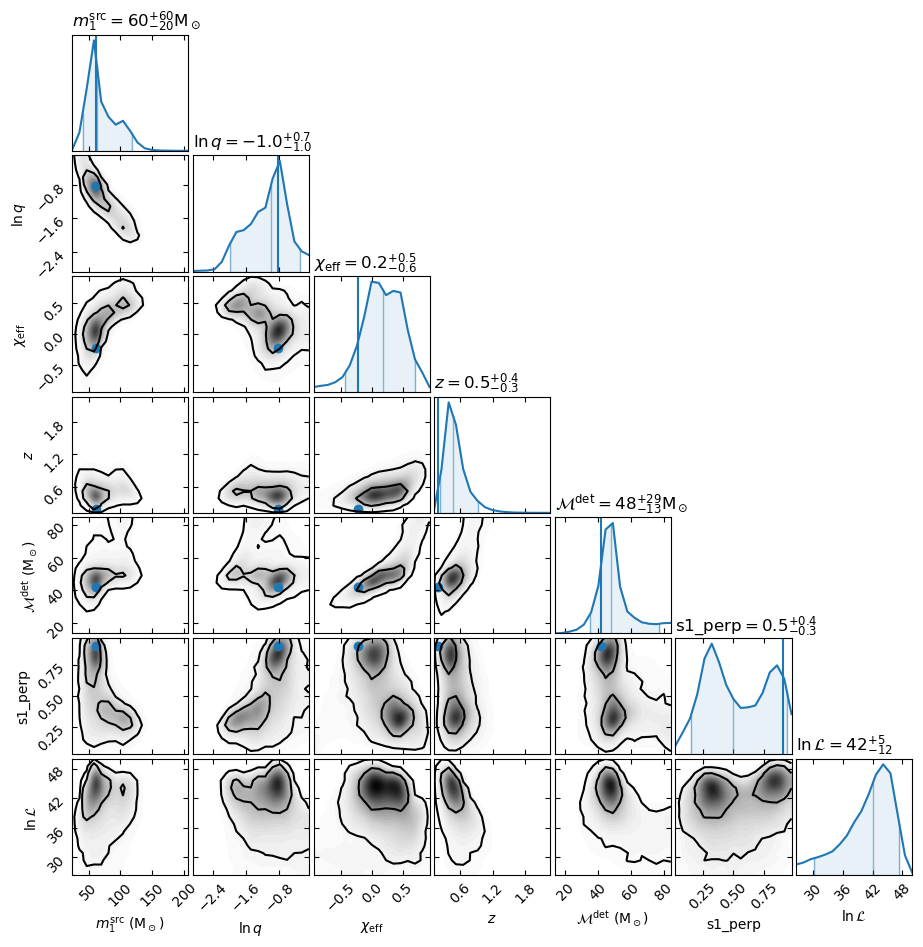

In [16]:
cp = gw_plotting.CornerPlot(s0[['m1_source', 'lnq', 'chieff', 'z','mchirp','s1_perp', 'lnl']])
cp.plot()
cp.scatter_points(max_lnl)

In [ ]:
# We provide the .npz objects which can be used for running cogwheel PE
# at samples_dir/f'{eventname}/*.npz
# see https://github.com/jroulet/cogwheel/tree/main/tutorials for running cogwheel